In [2]:
from scipy.special import comb, perm

In [7]:
perm(4,4, exact=True)

24

In [35]:
comb(52, 6)

20358520.0

In [6]:
comb(4, 4)

0.0

In [3]:
comb(10,2, exact=True) 

45

stdev

In [1]:
from statistics import stdev

In [3]:
stdev([1,5,2,7,1,9,3,8,5,9])

3.1622776601683795

p-value для z (сигма)

In [2]:
import numpy as np
from scipy import stats
n = 200 #наблюдений в выборке  
tt = 10 # t-значение  (~z значение, отклонение в сигма)
	  
pval = stats.t.sf(np.abs(tt), n-1)*2 # two-sided pvalue = Prob(abs(t)>tt)  
print('t-statistic = %6.3f pvalue = %6.4f' % (tt, pval))

t-statistic = 10.000 pvalue = 0.0000


qq plot

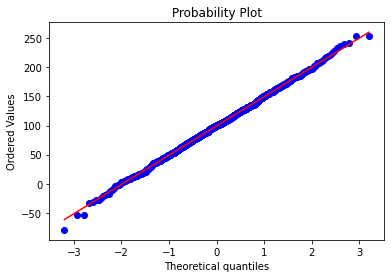

In [5]:
import pylab 
sample = np.random.normal(loc=100, scale=50., size=1000)

stats.probplot(sample, dist="norm", plot=pylab)

pylab.show()

In [1]:
import pandas as pd
import scipy.stats as stats
URL = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
data = pd.read_csv(URL)
A = data[data["Therapy"] == "A"]["expr"]
B = data[data["Therapy"] == "B"]["expr"]
C = data[data["Therapy"] == "C"]["expr"]
D = data[data["Therapy"] == "D"]["expr"]
stats.f_oneway(A, B, C, D)
#Получается результат:
#F_onewayResult(statistic=8.0373024811439908, pvalue=0.00015249722895229536)﻿

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

In [11]:
data.head(5)

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


<AxesSubplot:title={'center':'expr'}, xlabel='Therapy'>

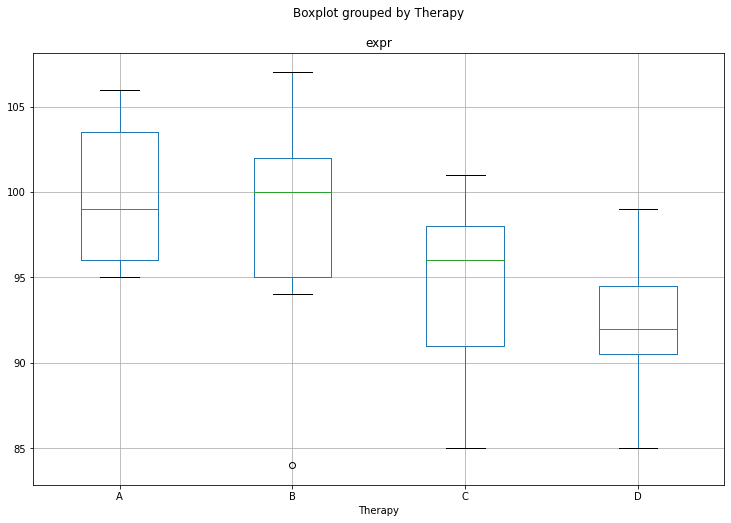

In [2]:
data.boxplot('expr', by='Therapy', figsize=(12, 8))

In [4]:
import pandas as pd
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

data = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')

MultiComp = MultiComparison(data['expr'], data['Therapy'])

MultiComp.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-0.9333,0.9514,-5.5959,3.7292,False
A,C,-5.3333,0.0189,-9.9959,-0.6708,True
A,D,-7.4,0.0005,-12.0626,-2.7374,True
B,C,-4.4,0.071,-9.0626,0.2626,False
B,D,-6.4667,0.0029,-11.1292,-1.8041,True
C,D,-2.0667,0.6458,-6.7292,2.5959,False


<AxesSubplot:xlabel='dose', ylabel='expr'>

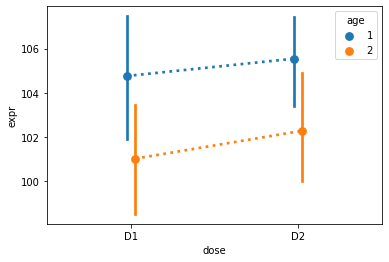

In [5]:
import seaborn as sns
import pandas as pd
df = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv')
sns.pointplot(x=df.dose, y=df.expr, hue=df.age, data=df, dodge=True, linestyles=[':', ':'])

In [2]:
import numpy as np

In [19]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv')
data['dose'] = np.where(data['dose'] == 'D1', 1, 2)
MultiComp = MultiComparison(data = data['expr'], groups= data[['age', 'dose']])

MultiComp.tukeyhsd().summary()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [20]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

URL = 'https://stepik.org/media/attachments/lesson/9250/birds.csv'
data = pd.read_csv(URL)

formula = 'var4 ~ hormone*sex' #same as formula = 'var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                 sum_sq    df         F    PR(>F)
hormone        0.847472   1.0  0.086528  0.769653
sex            0.119762   1.0  0.012228  0.912318
hormone:sex   89.483384   1.0  9.136390  0.003682
Residual     587.650394  60.0       NaN       NaN


<AxesSubplot:xlabel='hormone', ylabel='var4'>

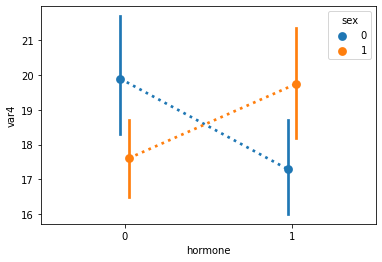

In [21]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/birds.csv')
sns.pointplot(x=df.hormone, y=df.var4, hue=df.sex, data=df, dodge=True, linestyles=[':', ':']) 

In [10]:
list2 = [4,5,2,3,1]
list1 = [2,1,4,3,5]
np.corrcoef(list1, list2)[0, 1]

-0.9999999999999999

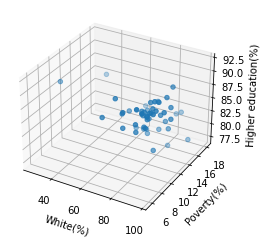

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

data_crop = data[['white', 'hs_grad', 'poverty']]
data_crop.head()
white, hs_grad, poverty = [column for column in data_crop.values.T]



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=white, ys=poverty, zs=hs_grad)

ax.set_xlabel('White(%)')
ax.set_ylabel('Poverty(%)')
ax.set_zlabel('Higher education(%)')

plt.show()

In [2]:
import statsmodels.formula.api as smf
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

data = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()

def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x  + lm.params.metro_res * y

x = data.hs_grad.sort_values()
y = data.metro_res.sort_values()

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

data_below_serf = data[data['poverty'] < f(data['hs_grad'], data['metro_res'])]
data_above_serf = data[data['poverty'] >= f(data['hs_grad'], data['metro_res'])]

fig = go.Figure(data=[go.Scatter3d(x=data_below_serf.hs_grad, 
                                   y=data_below_serf.metro_res, 
                                   z=data_below_serf.poverty, 
                                   mode='markers', 
                                   marker=dict(color='red', size=5))])
fig.add_trace(go.Scatter3d(x=data_above_serf.hs_grad, 
                           y=data_above_serf.metro_res, 
                           z=data_above_serf.poverty, 
                           mode='markers', 
                           marker=dict(color='blue', size=5)))
fig.add_trace(go.Surface(x=X, y=Y, z=Z,showscale=False, 
                         opacity=0.3))
fig.update_layout(scene = dict(
                    xaxis_title='hs_grad',
                    yaxis_title='metro_res',
                    zaxis_title='poverty'))
fig.show()

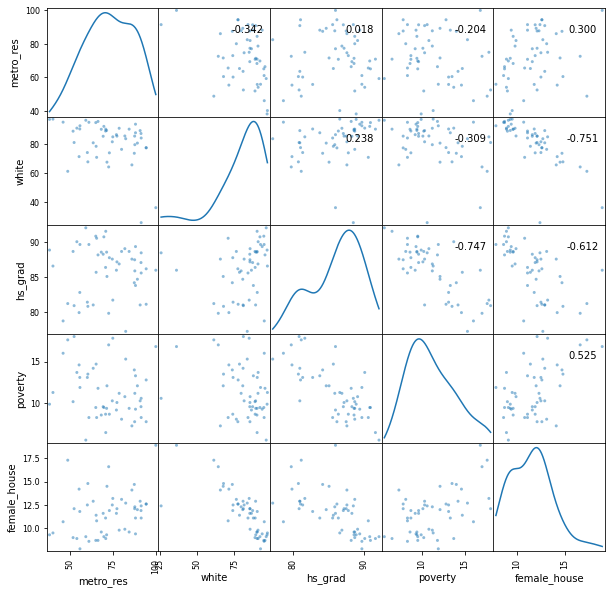

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(
    'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)
corr = data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [12]:
from scipy.stats import chi2_contingency as chi2c

chi2c( ([20, 15], [11, 12], [7, 9]) )

(0.9544070774762996,
 0.6205162173513055,
 2,
 array([[17.97297297, 17.02702703],
        [11.81081081, 11.18918919],
        [ 8.21621622,  7.78378378]]))

In [28]:
chi2c( ([18, 7], [6, 13]) )

(5.57719298245614,
 0.018195864430772903,
 1,
 array([[13.63636364, 11.36363636],
        [10.36363636,  8.63636364]]))

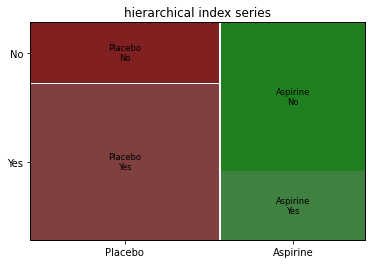

In [30]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt

tuples = list(product(['Placebo', 'Aspirine'], ['Yes', 'No']))
index = pd.MultiIndex.from_tuples(tuples)
data = pd.Series([18,7,6,13], index=index)
mosaic(data, title='hierarchical index series')
plt.show()

In [42]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
import numpy as np

def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))

In [43]:
cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([7, 13, 18, 6], index=idx)

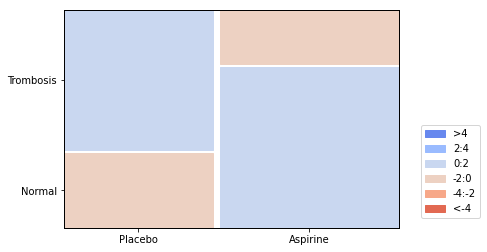

In [44]:
make_me_plot(data)

In [1]:
from scipy.stats import fisher_exact as fe #точный критерий Фишера

In [2]:
odds_ratio, p_value = fe([[1, 3], [3, 1]])  # odds_ratio - отношение шансов

print(p_value)
print(odds_ratio)

0.48571428571428527
0.1111111111111111


In [4]:
from math import log
from math import exp
from math import e

In [56]:
print(82/3) #odds
print(82/85) #chance
print(log(82/3)) #log of chance

27.333333333333332
0.9647058823529412
3.3081069585961433


In [67]:
x = 1.61 #intercept или другой коэф на выходе модели

In [68]:
exp(x) #=e^(1/2) #odds

5.002811227833588

In [69]:
exp(x)/(1+exp(x)) #P as chance

0.8334113864245404

In [ ]:
2 2 -1| - |0.5 0.5 -0.8
or         and

In [1]:
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf

category_columns = { col: 'category' for col in ['Survived', 'Sex'] }  # приведение выбранных колонок к категориальному

data = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv', dtype=category_columns)

# Зависимая переменная обычно обозначается как "Y" или "y"
Y = data.loc[:,'Survived'].cat.codes

# То о чем говорил преподаватель: колонку пол c сдвумя градациями нужно трансформировать в 2 колонки для каждого пола
X = sm.add_constant( data.loc[:,'Sex'].cat.codes )

U = True
#
# ВЫЧИСЛЯЕМ  
#
# Классическое представление результат-предиктор(ы), которое используется в классификаторах
glm_binom = sm.GLM(Y, X, family=sm.families.Binomial())
res = glm_binom.fit()
print( res.summary() )

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Fri, 09 Dec 2022   Deviance:                       917.80
Time:                        17:23:53   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0566      0.129      8.191      0.0

In [18]:
table = pd.crosstab(data.Survived, data.Sex)
table

Sex,female,male
Survived,,
0,81,468
1,233,109
